# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

## Inicialización

In [ ]:
import pandas as pd 
import math as mt 
import numpy as np 
from scipy import stats as st 
from math import factorial 
import seaborn as sns  # Cargar todas las librerías
import matplotlib.pyplot as plt
import scipy.stats as stats

## Cargar datos

In [ ]:
users=pd.read_csv('/datasets/megaline_users.csv')
calls=pd.read_csv('/datasets/megaline_calls.csv')# Carga los archivos de datos en diferentes DataFrames
messages=pd.read_csv('/datasets/megaline_messages.csv')
internet=pd.read_csv('/datasets/megaline_internet.csv')
plans=pd.read_csv('/datasets/megaline_plans.csv')

## Preparar los datos

## Tarifas

In [ ]:
plans.info() # Imprime la información general/resumida sobre el DataFrame de las tarifas



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [ ]:
print(plans.head()) # Imprime una muestra de los datos para las tarifas



   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate  


Una vez revisada tanto la información general, como impresa la muestra de los datos para las tarifas, considero que se cuenta con la información necesaria, correcta y requerida para continuar con el análisis. Sin embargo, con base en lo requerido para el análisis, la columna "mb_per_month_included" deberá ser cambiada a gb. 

## Corregir datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [ ]:
plans['gb_per_month_included'] = (plans['mb_per_month_included'] / 1024).astype('int')
plans.rename(columns={'usd_monthly_pay': 'usd_monthly_fee'}, inplace=True)
plans.info()
print(plans)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_fee        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
 8   gb_per_month_included  2 non-null      int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 272.0+ bytes
   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_fee  usd_per_gb  usd_per_message  usd_per_minute p

## Enriquecer los datos

Una vez agregada la columna "gb_per_month_included" con el la cantidad de GB por plan, modificado el tipo por int64 y modificado el nombre usd_monthly_pay por usd_monthly_fee, considero que no se requieren ajustes adicionales. 

## Usuarios/as

In [ ]:
# Imprime la información general/resumida sobre el DataFrame de usuarios

users.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [ ]:
# Imprime una muestra de datos para usuarios
users.head(20)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN
5,1005,Livia,Shields,31,"Dallas-Fort Worth-Arlington, TX MSA",2018-11-29,surf,NaN
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18
7,1007,Eusebio,Welch,42,"Grand Rapids-Kentwood, MI MSA",2018-07-11,surf,NaN
8,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,NaN
9,1009,Gerry,Little,19,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-04-22,surf,NaN


De una muestra aleatoria de 20 de los 500 datos, se evidencia que en términos generales no se presentan datos incorrectos en su tipo; sin embargo, en la columna "churn_date" está en tipo object pero para evaluación de las fechas de deserción, sería conveniente convertir estas a formato datetime, y los valores que no puedan convertirse a formato datetime (Los NaN) los reemplazaré por NaT usando error="coerce".

### Corregir los datos

La única corrección realizada se dio en la columna "churn_date", en la que di un formato específico de fehca (YYYY-mm-dd) y los valores ausentes, los modifiqué a NaT (Not a Time), luego tomaré otra muestra aleatoria de 20. 

In [ ]:
users['churn_date'] = pd.to_datetime(users['churn_date'], format= "%Y-%m-%d",errors='coerce')
users['reg_date'] = pd.to_datetime(users['reg_date'], format= "%Y-%m-%d",errors='coerce')
users.sample(20)
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


### Enriquecer los datos

Una vez realizadas las modificaciones en el numeral 1.7.1, no considero necesario hacer otras modificaciones. 

## Llamadas

In [ ]:
calls.info() # Imprime la información general/resumida sobre el DataFrame de las llamadas


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [ ]:
calls.head(50)# Imprime una muestra de datos para las llamadas



,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22
5,1000_388,1000,2018-12-31,2.20
6,1000_510,1000,2018-12-27,5.75
7,1000_521,1000,2018-12-28,14.18
8,1000_530,1000,2018-12-28,5.77
9,1000_544,1000,2018-12-26,4.40


Una vez analizadas las muestras, identifico la necesidad de modificar el dtype para la columnas call_date a formato datetime y duration a int, redondeando al número entero mayor más próximo, dado que Megaline realiza esto. 

### Corregir los datos

Se modificará el dtype para las columnas call_date a formato datetime y la columa duration a int, redondeando el valor entero mayor más próximo, esto usando el código np.ceil(). 

In [ ]:
calls['call_date'] = pd.to_datetime(calls['call_date'], format= "%Y-%m-%d",errors='coerce')
calls['duration']=np.ceil(calls['duration']).astype(int)


calls.info()
calls.sample(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 4.2+ MB


,id,user_id,call_date,duration
15487,1061_429,1061,2018-12-11,5
132026,1475_173,1475,2018-09-17,8
95149,1337_75,1337,2018-12-07,8
24402,1092_291,1092,2018-12-20,1
94734,1336_644,1336,2018-06-25,0
66485,1240_343,1240,2018-07-16,3
3832,1016_49,1016,2018-10-30,0
129803,1467_39,1467,2018-10-02,0
62233,1223_410,1223,2018-08-14,15
3692,1014_330,1014,2018-12-06,3


### Enriquecer los datos

Con base en lo realizado en el punto 1.8.1, no considero necesario a este punto hacer adiciones. 

## Mensajes

In [ ]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes
messages.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [ ]:
messages.sample(20)# Imprime una muestra de datos para los mensajes



,id,user_id,message_date
57761,1364_24,1364,2018-12-07
16421,1110_312,1110,2018-10-26
16471,1110_362,1110,2018-12-31
40866,1261_540,1261,2018-03-28
53997,1343_80,1343,2018-09-30
38038,1251_90,1251,2018-07-05
25808,1155_183,1155,2018-09-16
17848,1115_717,1115,2018-12-13
57340,1362_420,1362,2018-06-03
67505,1438_71,1438,2018-11-22


No evidencio ningún problema o datos inadecuados, sin embargo, identifico la necesidad de cambiar el tipo para la columna message_date de object a datetime, esto lo realizaré usando .astype() 

### Corregir los datos

Modificaré el tipo para la columna message_date de object a date time 

In [ ]:
messages['message_date'] = pd.to_datetime(messages['message_date'], format= "%Y-%m-%d",errors='coerce')
messages.info()
messages.head(20)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26
5,1000_346,1000,2018-12-29
6,1000_386,1000,2018-12-30
7,1000_413,1000,2018-12-31
8,1000_502,1000,2018-12-27
9,1000_525,1000,2018-12-28


### Enriquecer los datos

Una vez realizadas las modificaciones en el numeral 1.9.1, no considero necesario hacer otras modificaciones.

## Internet

In [ ]:
# Imprime la información general/resumida sobre el DataFrame de internet
internet.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [ ]:
# Imprime una muestra de datos para el tráfico de internet

internet.sample(50)

,id,user_id,session_date,mb_used
46849,1209_62,1209,2018-10-01,249.33
39449,1177_133,1177,2018-11-26,395.01
26630,1123_125,1123,2018-12-04,64.24
91770,1425_115,1425,2018-10-23,0.00
93121,1434_363,1434,2018-11-18,97.34
67995,1316_294,1316,2018-07-01,609.85
48612,1216_107,1216,2018-11-16,431.36
73491,1346_71,1346,2018-07-15,79.94
14951,1068_67,1068,2018-10-28,28.01
96503,1453_70,1453,2018-12-30,673.94


Una vez revisada la información, considero necesario necesario convertir los datos de la columna "mb_used" a consumo en gb. Adicionalmente, es necesario convertir el tipo de la columna "session_date" a datetime. 

### Corregir los datos

Únicamente modifiqué el tipo de la columna "session_date" a datetime. Intenté además modificar la información de las filas de la columna "mb_used" pero al ser datos tan pequeños, recibí 0 en la nueva columna, por tanto suprimí está modificación. 

In [ ]:
internet['session_date'] = pd.to_datetime(internet['session_date'], format= "%Y-%m-%d",errors='coerce')
internet.info()
internet.sample(50)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB


,id,user_id,session_date,mb_used
43944,1195_81,1195,2018-11-07,505.99
5846,1032_7,1032,2018-12-26,428.77
36413,1164_96,1164,2018-08-04,151.17
86106,1400_240,1400,2018-10-01,732.67
13296,1062_266,1062,2018-05-15,580.32
18443,1082_140,1082,2018-08-02,1020.04
27983,1128_137,1128,2018-07-17,307.82
47332,1211_209,1211,2018-11-20,748.52
58357,1263_161,1263,2018-12-19,896.32
76408,1359_88,1359,2018-09-24,466.52


### Enriquecer los datos

Una vez realizadas las modificaciones en el numeral 1.9.1, no considero necesario hacer otras modificaciones.

## Estudiar las condiciones de las tarifas

Si bien la indicación dice "imprime" usaré .head() para visualizar mejor la información.


In [ ]:
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras
plans.rename(columns={'plan_name': 'plan'}, inplace=True)
plans.head()


,messages_included,mb_per_month_included,minutes_included,usd_monthly_fee,usd_per_gb,usd_per_message,usd_per_minute,plan,gb_per_month_included
0,50,15360,500,20,10,0.03,0.03,surf,15
1,1000,30720,3000,70,7,0.01,0.01,ultimate,30


Respuesta estudiante: Una vez revisada la información, es posible evidenciar las dos condiciones, una ofrecida por Surf y la otra por Ultimate. La tabla nos permite visualizar lo que ambos planes incluyen de manera estándar, su tarifa mensual fija y los recargos por consumos adicionales. A grandes rasgos, Ultimate si bien tiene un costo más elevado, ofrece mayores beneficiones dentro de su paquete. 

## Agregar datos por usuario

Se agregará una serie que clasifique la duración de las llamadas de cada user_id por mes, así, podríamos determinar si está dentro de los parámetros estándar del plan adquirido. Además, para verificar si está consumiendo más minutos de llamadas que los incluidos en el plan, agregaré otra serie en la que, dependiendo de la empresa con la cual adquirió el plan, me determine si debe o no pagar un cargo adicional, esto se realizará por usuario. 

In [ ]:

#Extraemos el mes para poder consolidar la información de cada usuario por mes
calls['year_month']=calls['call_date'].dt.to_period('M')
#Creamos una columna para consolidar la cantidad de llamadas totales por usuario por mes
total_calls_monthly=calls.groupby(['user_id','year_month'])['call_date'].count().reset_index()


print(total_calls_monthly)



      user_id year_month  call_date
0        1000    2018-12         16
1        1001    2018-08         27
2        1001    2018-09         49
3        1001    2018-10         65
4        1001    2018-11         64
...       ...        ...        ...
2253     1498    2018-12         39
2254     1499    2018-09         41
2255     1499    2018-10         53
2256     1499    2018-11         45
2257     1499    2018-12         65

[2258 rows x 3 columns]


In [ ]:
# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.
#Redondeo la duración de las llamadas 
calls['duration']=np.ceil(calls['duration']).astype(int)
#Extremos el mes para poder consolidar la información de cada usuario por mes
calls['year_month']=calls['call_date'].dt.to_period('M')
#Creamos una columna para consolidar la duración total por usuario por mes
total_duration_monthly=calls.groupby(['user_id','year_month'])['duration'].sum().reset_index()


print(total_duration_monthly)



      user_id year_month  duration
0        1000    2018-12       124
1        1001    2018-08       182
2        1001    2018-09       315
3        1001    2018-10       393
4        1001    2018-11       426
...       ...        ...       ...
2253     1498    2018-12       339
2254     1499    2018-09       346
2255     1499    2018-10       385
2256     1499    2018-11       308
2257     1499    2018-12       496

[2258 rows x 3 columns]


In [ ]:

#Extraemos el mes para poder consolidar la información de cada usuario por mes
messages['year_month']=messages['message_date'].dt.to_period('M')
#Creamos una columna para consolidar la cantidad de mensajes totales enviados por usuario por mes
total_messages_monthly=messages.groupby(['user_id','year_month'])['message_date'].count().reset_index()


print(total_messages_monthly)
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.



      user_id year_month  message_date
0        1000    2018-12            11
1        1001    2018-08            30
2        1001    2018-09            44
3        1001    2018-10            53
4        1001    2018-11            36
...       ...        ...           ...
1801     1496    2018-09            21
1802     1496    2018-10            18
1803     1496    2018-11            13
1804     1496    2018-12            11
1805     1497    2018-12            50

[1806 rows x 3 columns]


In [ ]:

#Extraemos el mes para poder consolidar la información de cada usuario por mes
internet['year_month']=internet['session_date'].dt.to_period('M')
#Creamos una columna para consolidar la duración total por usuario por mes
total_traffic_monthly=internet.groupby(['user_id','year_month'])['mb_used'].sum().reset_index()

total_traffic_monthly['gb_used'] = (total_traffic_monthly['mb_used'] / 1024)
total_traffic_monthly['gb_used']=np.ceil(total_traffic_monthly['gb_used']).astype(int)


print(total_traffic_monthly)

# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.



      user_id year_month   mb_used  gb_used
0        1000    2018-12   1901.47        2
1        1001    2018-08   6919.15        7
2        1001    2018-09  13314.82       14
3        1001    2018-10  22330.49       22
4        1001    2018-11  18504.30       19
...       ...        ...       ...      ...
2272     1498    2018-12  23137.69       23
2273     1499    2018-09  12984.76       13
2274     1499    2018-10  19492.43       20
2275     1499    2018-11  16813.83       17
2276     1499    2018-12  22059.21       22

[2277 rows x 4 columns]


Para esto, necesitaremos usar .merge, esto con el fin de crear un data frame que combine los datos que hasta el momento hemos obtenido. 

In [ ]:
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month
users_consolidated_1 = total_calls_monthly.merge(total_duration_monthly, on=['user_id','year_month'], how='outer')
users_consolidated_2=users_consolidated_1.merge(total_messages_monthly, on=['user_id','year_month'], how='outer')
users_consolidated_3=users_consolidated_2.merge(total_traffic_monthly, on=['user_id','year_month'], how='outer')

#Mostramos el resultado del DataFrame creado
users_consolidated_3.head(20)

,user_id,year_month,call_date,duration,message_date,mb_used,gb_used
0,1000,2018-12,16.0,124.0,11.0,1901.47,2.0
1,1001,2018-08,27.0,182.0,30.0,6919.15,7.0
2,1001,2018-09,49.0,315.0,44.0,13314.82,14.0
3,1001,2018-10,65.0,393.0,53.0,22330.49,22.0
4,1001,2018-11,64.0,426.0,36.0,18504.30,19.0
5,1001,2018-12,56.0,412.0,44.0,19369.18,19.0
6,1002,2018-10,11.0,59.0,15.0,6552.01,7.0
7,1002,2018-11,55.0,386.0,32.0,19345.08,19.0
8,1002,2018-12,47.0,384.0,41.0,14396.24,15.0
9,1003,2018-12,149.0,1104.0,50.0,27044.14,27.0


In [ ]:
# Añade la información de la tarifa
users_plus_plan=plans.merge(users,on='plan',how='right')
users_consolidated_4=users_plus_plan.merge(users_consolidated_3,on=['user_id'],how='right')
users_consolidated_5=['user_id','first_name','last_name','age','city','reg_date','churn_date','plan',"messages_included","mb_per_month_included","gb_per_month_included","minutes_included","usd_monthly_fee","usd_per_gb","usd_per_message","usd_per_minute","year_month","call_date","duration","message_date","mb_used","gb_used"]
users_consolidated_4=users_consolidated_4[users_consolidated_5]
print(users_consolidated_4)



      user_id  first_name  last_name  age  \
0        1000    Anamaria      Bauer   45   
1        1001      Mickey  Wilkerson   28   
2        1001      Mickey  Wilkerson   28   
3        1001      Mickey  Wilkerson   28   
4        1001      Mickey  Wilkerson   28   
...       ...         ...        ...  ...   
2288     1349  Florentina       Diaz   69   
2289     1361     Jacelyn    Hoffman   45   
2290     1482      Armand      Glenn   70   
2291     1108    Porfirio       Kane   45   
2292     1311     Cherlyn   Saunders   69   

                                           city   reg_date churn_date  \
0         Atlanta-Sandy Springs-Roswell, GA MSA 2018-12-24        NaT   
1               Seattle-Tacoma-Bellevue, WA MSA 2018-08-13        NaT   
2               Seattle-Tacoma-Bellevue, WA MSA 2018-08-13        NaT   
3               Seattle-Tacoma-Bellevue, WA MSA 2018-08-13        NaT   
4               Seattle-Tacoma-Bellevue, WA MSA 2018-08-13        NaT   
...                  

[Calcula los ingresos mensuales por usuario (resta el límite del paquete gratuito del número total de llamadas, mensajes de texto y datos; multiplica el resultado por el valor del plan de llamadas; añade la tarifa mensual en función del plan de llamadas). Nota: Dadas las condiciones del plan, ¡esto podría no ser tan trivial como un par de líneas! Así que no pasa nada si dedicas algo de tiempo a ello.]

In [ ]:
# Calcula el ingreso mensual para cada usuario

def calculate_extra_fee_calls(row):
    if row['plan'] == 'surf' and row['minutes_included'] > row["minutes_included"]:
        return (row['duration'] - row["minutes_included"]) * row["usd_per_minute"]
    elif row['plan'] == 'ultimate' and row['duration'] > row["minutes_included"]:
        return (row['duration'] - row["minutes_included"]) * row["usd_per_minute"]
    else:
        return 0


def calculate_extra_fee_messages(row):
    if row['plan'] == 'surf' and row['message_date'] > row["messages_included"]:
        return (row['message_date'] - row["messages_included"]) * row["usd_per_message"]
    elif row['plan'] == 'ultimate' and row['message_date'] > row["messages_included"]:
        return (row['message_date'] - row["messages_included"]) * row["usd_per_message"]
    else:
        return 0
    
def calculate_extra_fee_internet(row):
    if row['plan'] == 'surf' and row['gb_used'] > row["gb_per_month_included"]:
        return (row['gb_used'] - row["gb_per_month_included"]) * row["usd_per_gb"]
    elif row['plan'] == 'ultimate' and row['gb_used'] > row["gb_per_month_included"]:
        return (row['gb_used'] - row["gb_per_month_included"]) * row["usd_per_gb"]
    else:
        return 0

users_consolidated_4['extra_fee_calls'] = users_consolidated_4.apply(calculate_extra_fee_calls, axis=1)
users_consolidated_4['extra_fee_message'] = users_consolidated_4.apply(calculate_extra_fee_messages, axis=1)
users_consolidated_4['extra_fee_internet'] = users_consolidated_4.apply(calculate_extra_fee_internet, axis=1)

for user in users_consolidated_4:
    users_consolidated_4['income_monthly_user']=users_consolidated_4['usd_monthly_fee']+users_consolidated_4['extra_fee_calls']+users_consolidated_4['extra_fee_message']+users_consolidated_4['extra_fee_internet']

users_consolidated_4.head(10)



,user_id,first_name,last_name,age,city,reg_date,churn_date,plan,messages_included,mb_per_month_included,...,year_month,call_date,duration,message_date,mb_used,gb_used,extra_fee_calls,extra_fee_message,extra_fee_internet,income_monthly_user
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,NaT,ultimate,1000,30720,...,2018-12,16.0,124.0,11.0,1901.47,2.0,0,0.00,0.0,70.00
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,NaT,surf,50,15360,...,2018-08,27.0,182.0,30.0,6919.15,7.0,0,0.00,0.0,20.00
2,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,NaT,surf,50,15360,...,2018-09,49.0,315.0,44.0,13314.82,14.0,0,0.00,0.0,20.00
3,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,NaT,surf,50,15360,...,2018-10,65.0,393.0,53.0,22330.49,22.0,0,0.09,70.0,90.09
4,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,NaT,surf,50,15360,...,2018-11,64.0,426.0,36.0,18504.30,19.0,0,0.00,40.0,60.00
5,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,NaT,surf,50,15360,...,2018-12,56.0,412.0,44.0,19369.18,19.0,0,0.00,40.0,60.00
6,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,NaT,surf,50,15360,...,2018-10,11.0,59.0,15.0,6552.01,7.0,0,0.00,0.0,20.00
7,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,NaT,surf,50,15360,...,2018-11,55.0,386.0,32.0,19345.08,19.0,0,0.00,40.0,60.00
8,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,NaT,surf,50,15360,...,2018-12,47.0,384.0,41.0,14396.24,15.0,0,0.00,0.0,20.00
9,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,NaT,surf,50,15360,...,2018-12,149.0,1104.0,50.0,27044.14,27.0,0,0.00,120.0,140.00


## Estudia el comportamiento de usuario

[Calcula algunas estadísticas descriptivas para los datos agregados y fusionados que nos sean útiles y que muestren un panorama general captado por los datos. Dibuja gráficos útiles para facilitar la comprensión. Dado que la tarea principal es comparar las tarifas y decidir cuál es más rentable, las estadísticas y gráficas deben calcularse por tarifa.]

[En los comentarios hallarás pistas relevantes para las llamadas, pero no las hay para los mensajes e Internet. Sin embargo, el principio del estudio estadístico que se aplica para ellos es el mismo que para las llamadas.]

### Llamadas

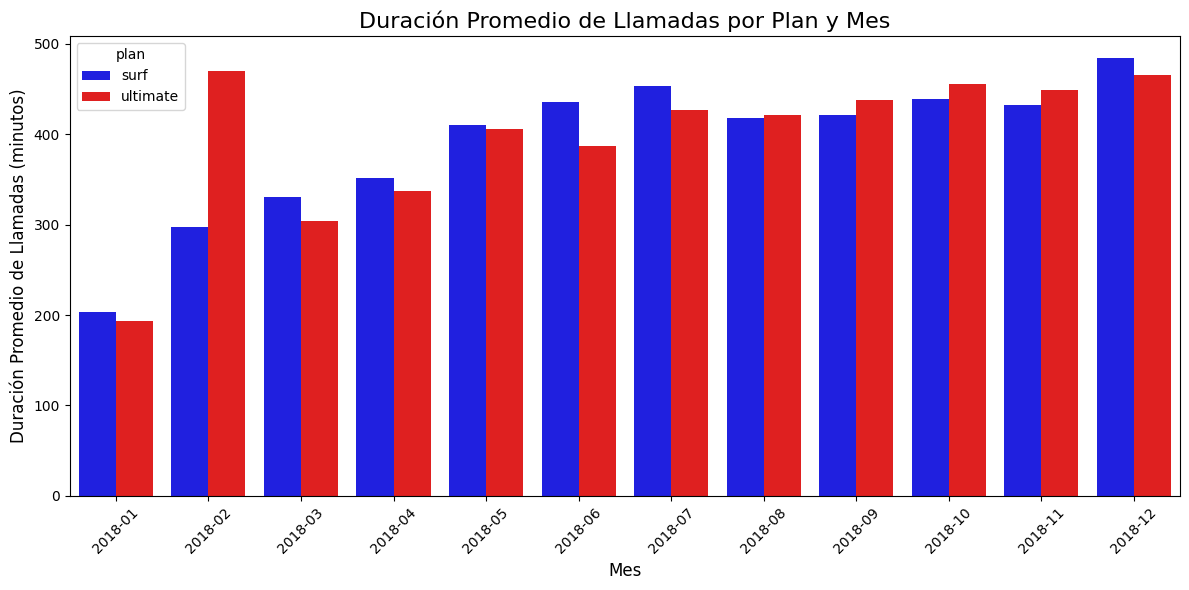

In [ ]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.

# Agrupar los datos por 'plan' y 'year_month' y calcular la duración promedio de las llamadas
avg_duration_by_plan_and_month = users_consolidated_4.groupby(['plan', 'year_month'])['duration'].mean().reset_index()

# Configuración del gráfico
color_palette = {'surf': 'blue', 'ultimate': 'red'}
plt.figure(figsize=(12, 6))

# Usar Seaborn para crear un gráfico de barras
sns.barplot(x='year_month', y='duration', hue='plan', data=avg_duration_by_plan_and_month, palette=color_palette)

# Añadir título y etiquetas
plt.title('Duración Promedio de Llamadas por Plan y Mes', fontsize=16)
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Duración Promedio de Llamadas (minutos)', fontsize=12)
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mayor claridad

# Mostrar el gráfico
plt.tight_layout()
plt.show()

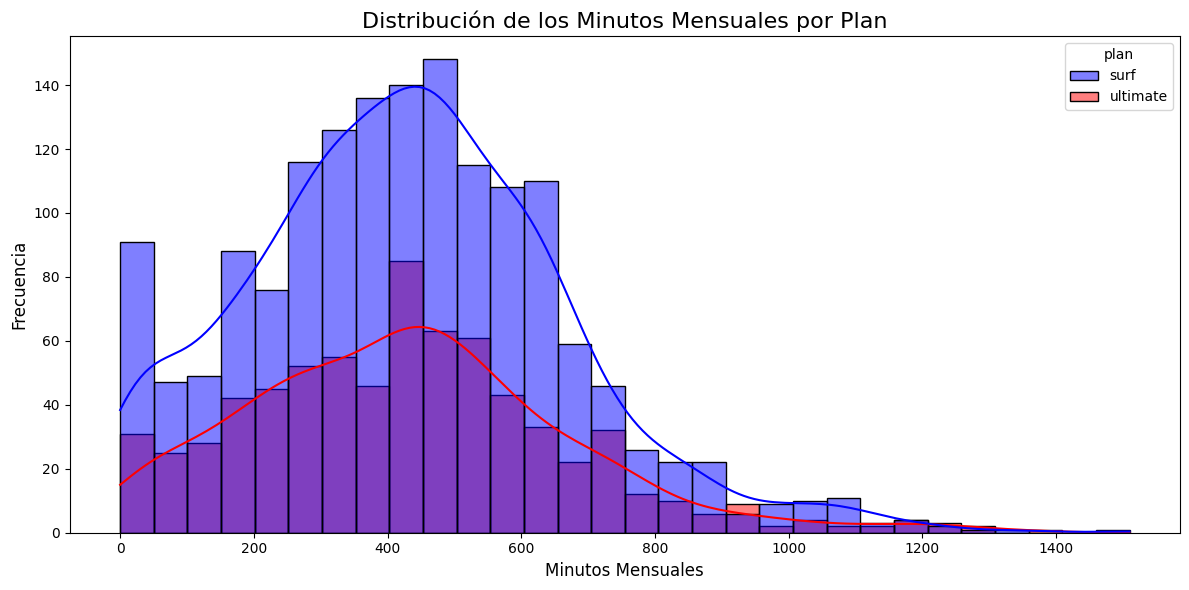

In [ ]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.

# Agrupar los datos por 'plan', 'user_id' y 'year_month', y calcular la duración total de las llamadas por mes
minutes_monthly = users_consolidated_4.groupby(['plan', 'user_id', 'year_month'])['duration'].sum().reset_index()

# Configuración del gráfico
color_palette = {'surf': 'blue', 'ultimate': 'red'}
plt.figure(figsize=(12, 6))

# Usar Seaborn para crear el histograma
sns.histplot(data=minutes_monthly, x='duration', hue='plan', kde=True, bins=30, palette=color_palette)

# Añadir título y etiquetas
plt.title('Distribución de los Minutos Mensuales por Plan', fontsize=16)
plt.xlabel('Minutos Mensuales', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

[Calcula la media y la variable de la duración de las llamadas para averiguar si los usuarios de los distintos planes se comportan de forma diferente al realizar sus llamadas.]

In [ ]:

income_monthly = users_consolidated_4.groupby(['plan', 'user_id', 'year_month'])['duration'].sum().reset_index()

#Calculo las métricas por plan, para tenerlas divididas 
stats_by_plan = income_monthly.groupby('plan')['duration'].agg(['mean', 'var', 'std'])

#Modifico el nombre de las columnas 
stats_by_plan.columns = ['Media', 'Varianza', 'Desviación Estándar']

print(stats_by_plan)

               Media      Varianza  Desviación Estándar
plan                                                   
surf      428.749523  54968.279461           234.453150
ultimate  430.450000  57844.464812           240.508762


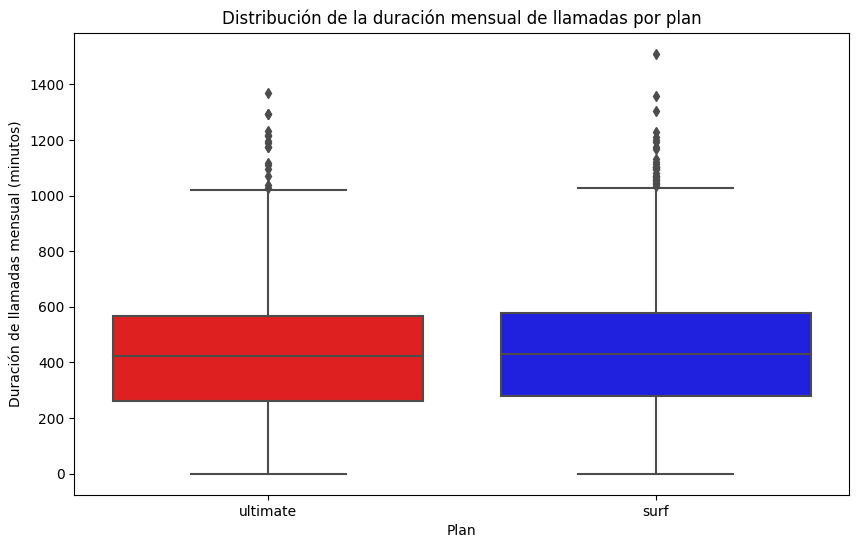

In [ ]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas

# Traza un diagrama de caja (boxplot)
plt.figure(figsize=(10, 6))  
sns.boxplot(x='plan', y='duration', data=users_consolidated_4, palette={'surf': 'blue', 'ultimate': 'red'})

# Personalizar el gráfico
plt.title('Distribución de la duración mensual de llamadas por plan')
plt.xlabel('Plan')
plt.ylabel('Duración de llamadas mensual (minutos)')
plt.show()

Considero que hay una variación considerable en función del plan adquirido. Respecto a los usuarios con el plan surf, es posible evidenciar que dado la restricción en el límite de minutos, tienden a incurrir en cargos adicionales sobre su factura. 

Ahora bien, los usuarios de ultimate en promedio no alcanzan a sobrepasar el número de minutos que ofrece su plan. 

### Mensajes

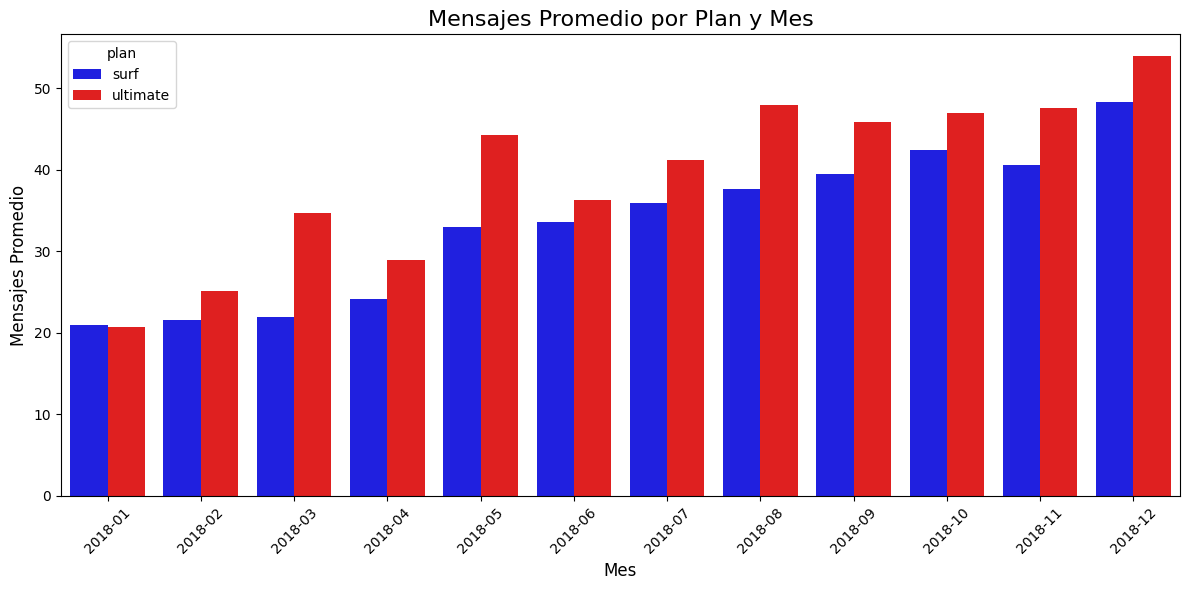

In [ ]:
# Compara el número de mensajes por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.

# Agrupar los datos por 'plan' y 'year_month' y calcular el número promedio de mensajes
avg_message_by_plan_and_month = users_consolidated_4.groupby(['plan', 'year_month'])['message_date'].mean().reset_index()

# Configuración del gráfico
color_palette = {'surf': 'blue', 'ultimate': 'red'}
plt.figure(figsize=(12, 6))

# Usar Seaborn para crear un gráfico de barras
sns.barplot(x='year_month', y='message_date', hue='plan', data=avg_message_by_plan_and_month, palette=color_palette)

# Añadir título y etiquetas
plt.title('Mensajes Promedio por Plan y Mes', fontsize=16)
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Mensajes Promedio', fontsize=12)
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mayor claridad

# Mostrar el gráfico
plt.tight_layout()
plt.show()


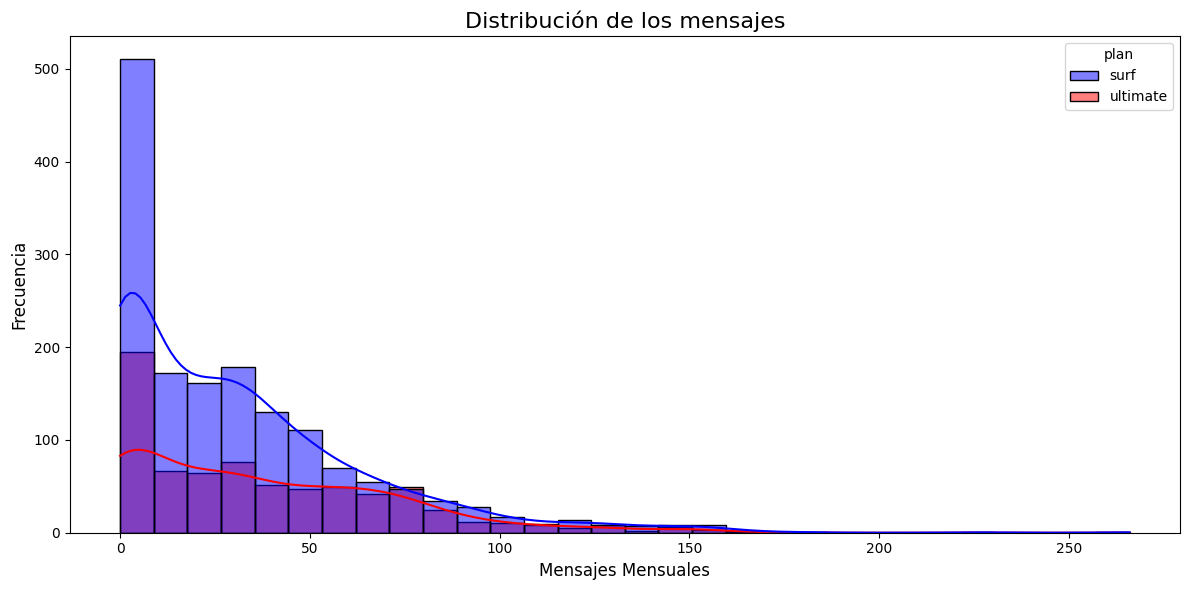

In [ ]:
# Compara el número de menesajes mensuales que necesitan los usuarios de cada plan. Traza un histograma.

# Agrupar los datos por 'plan', 'user_id' y 'year_month', y calcular los mensajes por mes
minutes_monthly = users_consolidated_4.groupby(['plan', 'user_id', 'year_month'])['message_date'].sum().reset_index()

# Configuración del gráfico
color_palette = {'surf': 'blue', 'ultimate': 'red'}
plt.figure(figsize=(12, 6))

# Usar Seaborn para crear el histograma
sns.histplot(data=minutes_monthly, x='message_date', hue='plan', kde=True, bins=30, palette=color_palette)

# Añadir título y etiquetas
plt.title('Distribución de los mensajes', fontsize=16)
plt.xlabel('Mensajes Mensuales', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)

# Mostrar el gráfico
plt.tight_layout()
plt.show()



In [ ]:
income_monthly = users_consolidated_4.groupby(['plan', 'user_id', 'year_month'])['message_date'].sum().reset_index()

#Calculo las métricas por plan, para tenerlas divididas 
stats_by_plan = income_monthly.groupby('plan')['message_date'].agg(['mean', 'var', 'std'])

#Modifico el nombre de las columnas 
stats_by_plan.columns = ['Media', 'Varianza', 'Desviación Estándar']

print(stats_by_plan)

              Media     Varianza  Desviación Estándar
plan                                                 
surf      31.159568  1126.724522            33.566717
ultimate  37.551389  1208.756744            34.767179


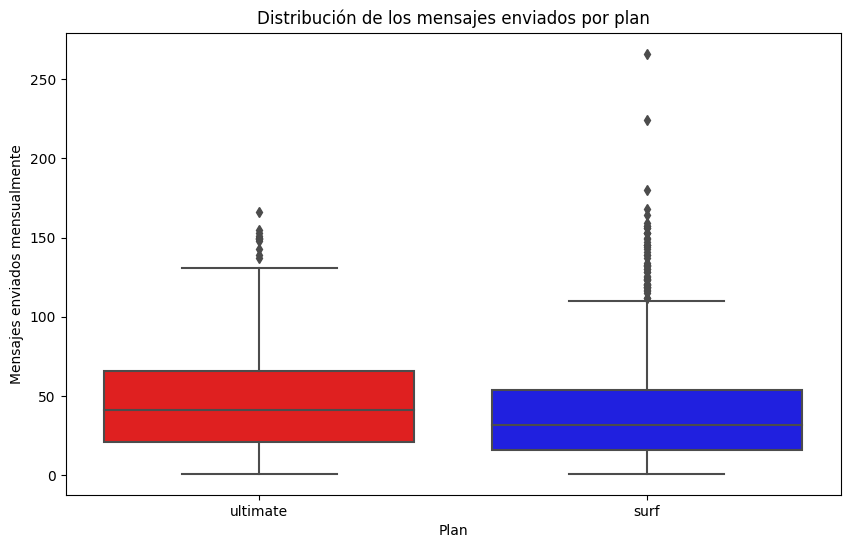

In [ ]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de los mensajes

# Traza un diagrama de caja (boxplot)
plt.figure(figsize=(10, 6))  
sns.boxplot(x='plan', y='message_date', data=users_consolidated_4, palette={'surf': 'blue', 'ultimate': 'red'})

# Personalizar el gráfico
plt.title('Distribución de los mensajes enviados por plan')
plt.xlabel('Plan')
plt.ylabel('Mensajes enviados mensualmente')
plt.show()

Se presenta un comportamiento similar al de las llamadas, los usuarios de ambos planes tienden a estar dentro del rango de mensajes que les ofrece su plan, sin perjucio de contar con algunos usuarios que sobrepasan dicha condición lo que, por defecto, les incurrirá en cargos adicionales por envío de SMS. 

### Internet

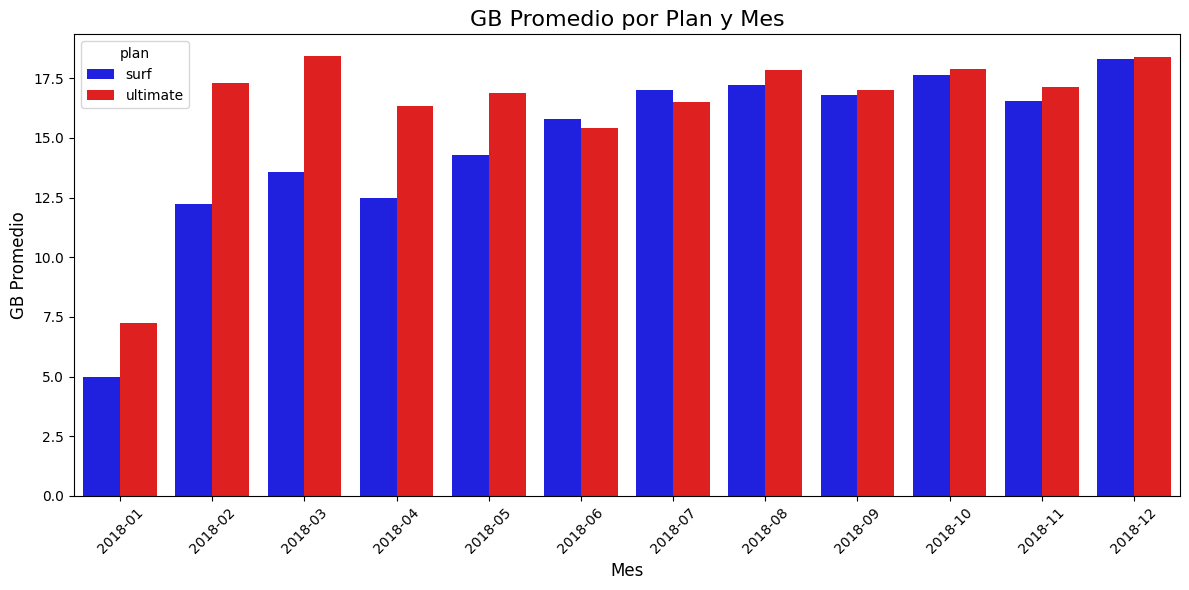

In [ ]:
# Compara el número de gb por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.

# Agrupar los datos por 'plan' y 'year_month' y calcular el número promedio de gb
avg_gb_by_plan_and_month = users_consolidated_4.groupby(['plan', 'year_month'])['gb_used'].mean().reset_index()

# Configuración del gráfico
color_palette = {'surf': 'blue', 'ultimate': 'red'}
plt.figure(figsize=(12, 6))

# Usar Seaborn para crear un gráfico de barras
sns.barplot(x='year_month', y='gb_used', hue='plan', data=avg_gb_by_plan_and_month, palette=color_palette)

# Añadir título y etiquetas
plt.title('GB Promedio por Plan y Mes', fontsize=16)
plt.xlabel('Mes', fontsize=12)
plt.ylabel('GB Promedio', fontsize=12)
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mayor claridad

# Mostrar el gráfico
plt.tight_layout()
plt.show()


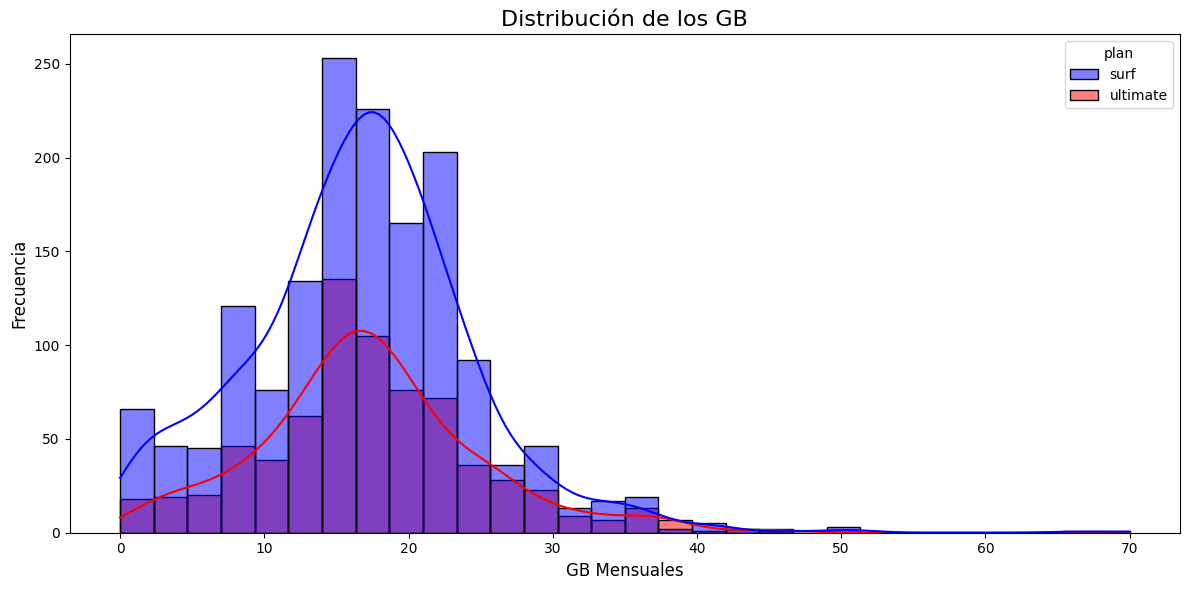

In [ ]:
# Compara el número de GB mensuales que necesitan los usuarios de cada plan. Traza un histograma.

# Agrupar los datos por 'plan', 'user_id' y 'year_month', y calcular los GB por mes
gb_monthly = users_consolidated_4.groupby(['plan', 'user_id', 'year_month'])['gb_used'].sum().reset_index()

# Configuración del gráfico
color_palette = {'surf': 'blue', 'ultimate': 'red'}
plt.figure(figsize=(12, 6))

# Usar Seaborn para crear el histograma
sns.histplot(data=gb_monthly, x='gb_used', hue='plan', kde=True, bins=30, palette=color_palette)

# Añadir título y etiquetas
plt.title('Distribución de los GB', fontsize=16)
plt.xlabel('GB Mensuales', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)

# Mostrar el gráfico
plt.tight_layout()
plt.show()


In [ ]:
income_monthly = users_consolidated_4.groupby(['plan', 'user_id', 'year_month'])['gb_used'].sum().reset_index()

#Calculo las métricas por plan, para tenerlas divididas 
stats_by_plan = income_monthly.groupby('plan')['gb_used'].agg(['mean', 'var', 'std'])

#Modifico el nombre de las columnas 
stats_by_plan.columns = ['Media', 'Varianza', 'Desviación Estándar']

print(stats_by_plan)

              Media  Varianza  Desviación Estándar
plan                                              
surf      16.670693  61.58360             7.847522
ultimate  17.306944  58.83055             7.670108


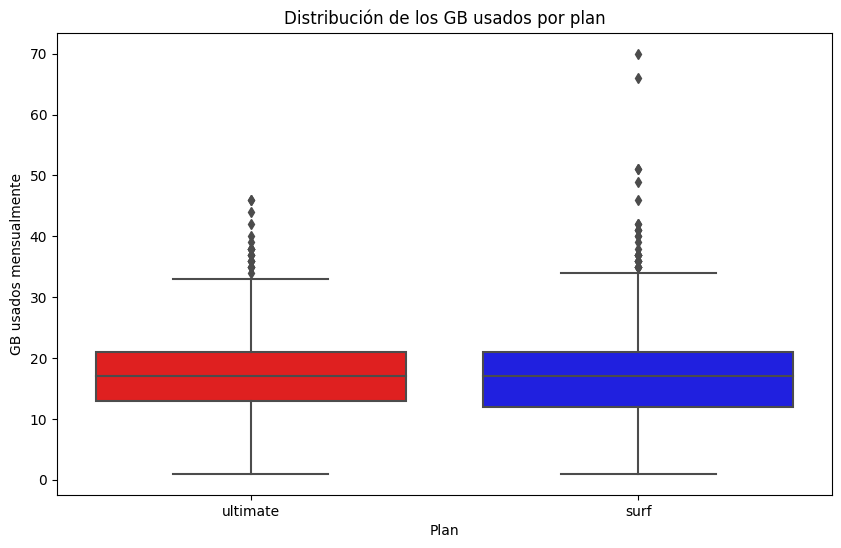

In [ ]:
# Traza un diagrama de caja para visualizar la distribución de los GB usados por mes

# Traza un diagrama de caja (boxplot)
plt.figure(figsize=(10, 6))  
sns.boxplot(x='plan', y='gb_used', data=users_consolidated_4, palette={'surf': 'blue', 'ultimate': 'red'})

# Personalizar el gráfico
plt.title('Distribución de los GB usados por plan')
plt.xlabel('Plan')
plt.ylabel('GB usados mensualmente')
plt.show()

Para el caso del servicio de datos (en GB) es posible evidenciar una alta demanda e incurrencia en cargos adicionales para los usuarios de ultimate, ya que la mayoría de usuarios usan más de 15 GB mensualmente; por otro lado, los usuarios de surf, aunque con cierta varianza, tienden a mantener su uso dentro de lo ofrecido por surf. 

## Ingreso

[Del mismo modo que has estudiado el comportamiento de los usuarios, describe estadísticamente los ingresos de los planes.]

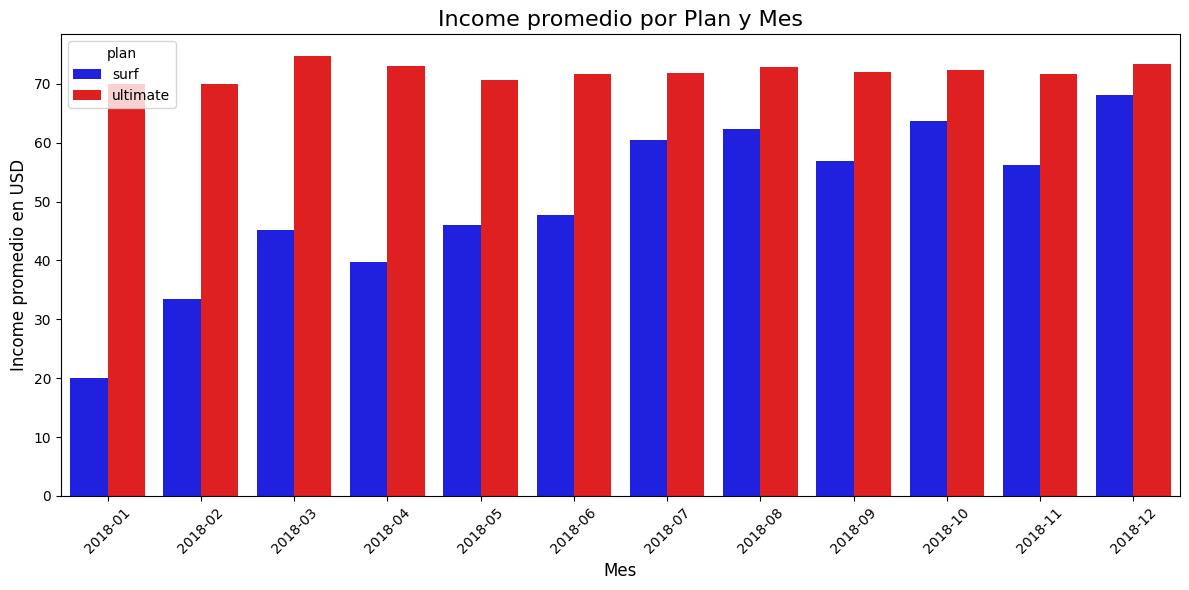

In [ ]:
# Compara el income por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.

# Agrupar los datos por 'plan' y 'year_month' y calcular el income por mes
avg_income_by_plan_and_month = users_consolidated_4.groupby(['plan', 'year_month'])['income_monthly_user'].mean().reset_index()

# Configuración del gráfico
color_palette = {'surf': 'blue', 'ultimate': 'red'}
plt.figure(figsize=(12, 6))

# Usar Seaborn para crear un gráfico de barras
sns.barplot(x='year_month', y='income_monthly_user', hue='plan', data=avg_income_by_plan_and_month, palette=color_palette)

# Añadir título y etiquetas
plt.title('Income promedio por Plan y Mes', fontsize=16)
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Income promedio en USD', fontsize=12)
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mayor claridad

# Mostrar el gráfico
plt.tight_layout()
plt.show()

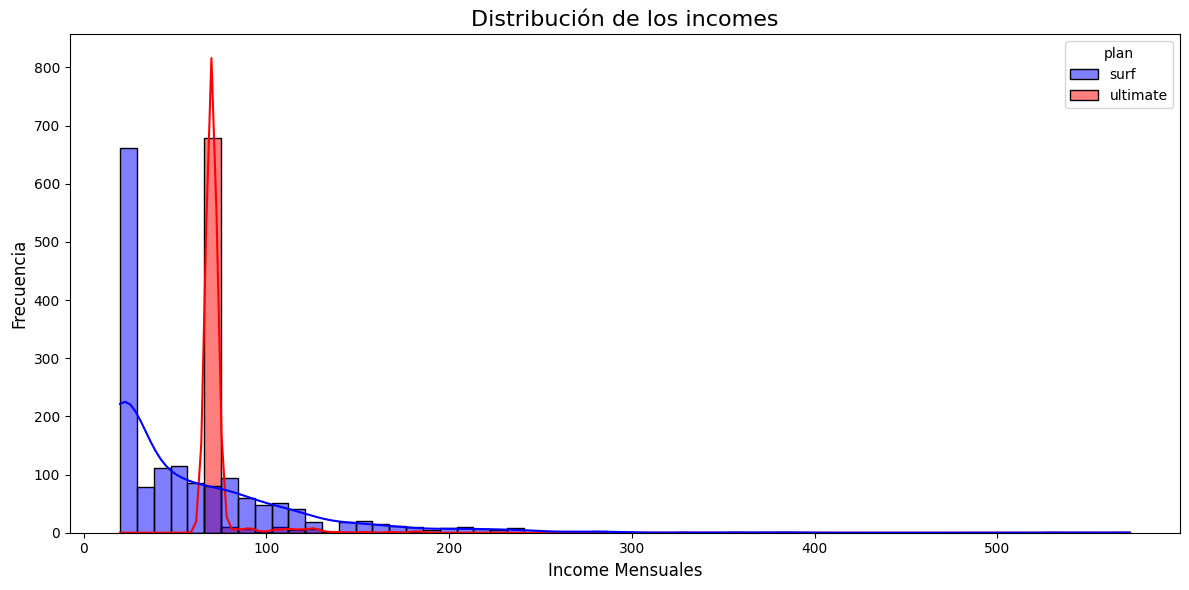

In [ ]:
# Compara el número de income mensuales de cada plan. Traza un histograma.

# Agrupar los datos por 'plan', 'user_id' y 'year_month', y calcular los income mensuales
income_monthly = users_consolidated_4.groupby(['plan', 'user_id', 'year_month'])['income_monthly_user'].sum().reset_index()

# Configuración del gráfico
color_palette = {'surf': 'blue', 'ultimate': 'red'}
plt.figure(figsize=(12, 6))

# Usar Seaborn para crear el histograma
sns.histplot(data=income_monthly, x='income_monthly_user', hue='plan', kde=True, bins=60, palette=color_palette)

# Añadir título y etiquetas
plt.title('Distribución de los incomes', fontsize=16)
plt.xlabel('Income Mensuales', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)

# Mostrar el gráfico
plt.tight_layout()
plt.show()


In [ ]:
income_monthly = users_consolidated_4.groupby(['plan', 'user_id', 'year_month'])['income_monthly_user'].sum().reset_index()

#Calculo las métricas por plan, para tenerlas divididas 
stats_by_plan = income_monthly.groupby('plan')['income_monthly_user'].agg(['mean', 'var', 'std'])

#Modifico el nombre de las columnas 
stats_by_plan.columns = ['Media', 'Varianza', 'Desviación Estándar']

print(stats_by_plan)

              Media     Varianza  Desviación Estándar
plan                                                 
surf      58.862638  2975.596549            54.549029
ultimate  72.313889   129.848486            11.395108


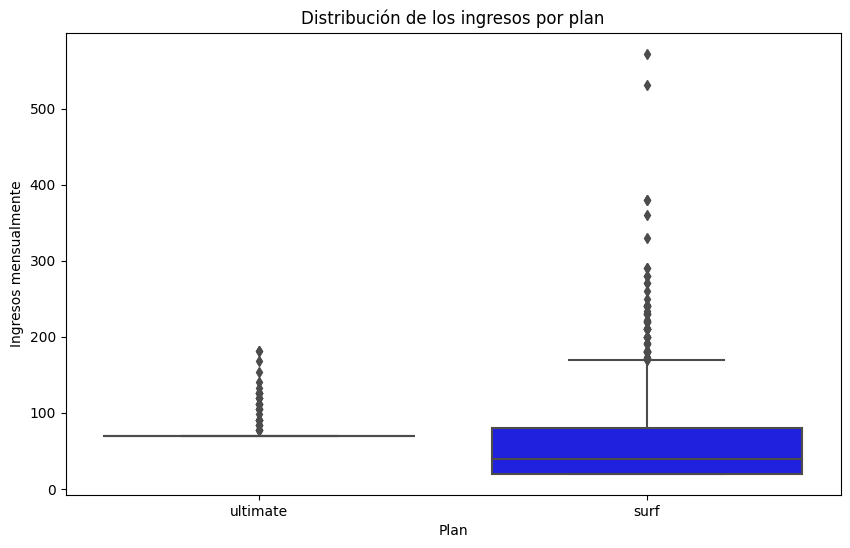

In [ ]:
# Traza un diagrama de caja para visualizar la distribución de los ingresos por mes

# Traza un diagrama de caja (boxplot)
plt.figure(figsize=(10, 6))  
sns.boxplot(x='plan', y='income_monthly_user', data=users_consolidated_4, palette={'surf': 'blue', 'ultimate': 'red'})

# Personalizar el gráfico
plt.title('Distribución de los ingresos por plan')
plt.xlabel('Plan')
plt.ylabel('Ingresos mensualmente')
plt.show()

Es posible evidenciar que los usuarios de ambos planes tienden a pagar cargos adicionales a causa de uso mayor a los servicios ofrecidos por Surf y Ultimate, tendiendo esta ser más común en los usuarios de Ultimate a causa de los GB adicionales requeridos mensualmente, sin desconcer de que por parte de algunos usuarios de surf también se presenta un uso mayor a lo ofrecido de manera estándar por esta línea. 

## Prueba las hipótesis estadísticas

In [ ]:
# Prueba las hipótesis

# Filtro los datos para los planes 'surf' y 'ultimate'
ultimate_income = users_consolidated_4[users_consolidated_4['plan'] == 'ultimate']['income_monthly_user']
surf_income = users_consolidated_4[users_consolidated_4['plan'] == 'surf']['income_monthly_user']

# Realizo la prueba t de Student para dos muestras independientes
t_stat, p_value = stats.ttest_ind(ultimate_income, surf_income, equal_var=False)  # asumimos varianzas desiguales

# Mostrar el valor t y el valor p
print(f"Valor t: {t_stat}")
print(f"Valor p: {p_value}")

# Tomar la decisión
alpha = 0.05
if p_value < alpha:
    print("Rechazamos la hipótesis nula. Hay una diferencia significativa en los ingresos promedio entre los planes 'Ultimate' y 'Surf'.")
else:
    print("No podemos rechazar la hipótesis nula. No hay suficiente evidencia para afirmar que los ingresos promedio difieren entre los planes 'Ultimate' y 'Surf'.")

Valor t: 9.344718611813233
Valor p: 2.5613755181532966e-20
Rechazamos la hipótesis nula. Hay una diferencia significativa en los ingresos promedio entre los planes 'Ultimate' y 'Surf'.


In [ ]:
# Prueba las hipótesis

# Filtro los datos para los usuarios del área NY-NJ
ny_nj_income = users_consolidated_4[users_consolidated_4['city'] == 'New York-Newark-Jersey City, NY-NJ-PA MSA']['income_monthly_user']

# Filtro los datos para los usuarios de otras regiones
other_regions_income = users_consolidated_4[users_consolidated_4['city'] != 'New York-Newark-Jersey City, NY-NJ-PA MSA']['income_monthly_user']

# Realizola prueba t de Student para dos muestras independientes
t_stat, p_value = stats.ttest_ind(ny_nj_income, other_regions_income, equal_var=False)  # asumimos varianzas desiguales

# Muestro el valor t y el valor p
print(f"Valor t: {t_stat}")
print(f"Valor p: {p_value}")

# Tomo la decisión
alpha = 0.05
if p_value < alpha:
    print("Rechazamos la hipótesis nula. Hay una diferencia significativa en los ingresos promedio entre los usuarios del área NY-NJ y los de otras regiones.")
else:
    print("No podemos rechazar la hipótesis nula. No hay suficiente evidencia para afirmar que los ingresos promedio difieren entre los usuarios del área NY-NJ y los de otras regiones.")

Valor t: -2.1923231649466426
Valor p: 0.028765503550625456
Rechazamos la hipótesis nula. Hay una diferencia significativa en los ingresos promedio entre los usuarios del área NY-NJ y los de otras regiones.


## Conclusión general

Después de realizar una organización de la información, inclusión de columnas adicionales con información valiosa y requerida para el análisis estadístico de la información, logre presentar diferentes consideraciones: 

1. Megaline cuenta con un sistema adecuado de registro de información, toda vez que no se presentó la necesidad de realizar ajustes de fondo sobre la información presentada en los diferentes dataframes. 
2. Los usuarios tienden a mostrar un comportamiento variable según la línea con la que cuenten (Surf o ultimate). 
3. Los usuarios de Surf tienden a tener un pago adicional mucho mayor en consideración a los que pueden tener los usuarios de Ultimate, esto quizás a que los planes ofrecidos por Ultimate contienen mejores beneficios. 
4. Como recomendación, aconsejaría a Megaline a iniciar el registro de uso de internet en GB en vez de MB, esto en función de que los análisis requeridos y realizados se dieron en GB. 